In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [2]:
df = pd.read_csv('../data/loan_approval_dataset.csv')
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

# Data Preprocessing

## Check for nan values

In [3]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Check Dtypes and column names

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
# remove the space in the column name
df.columns = df.columns.str.replace(' ','')


In [49]:
# update the type of columns
cols = ['education', 'self_employed', 'loan_status']

for col in cols:
    df[col] = df[col].astype('string')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   string
 3   self_employed             4269 non-null   string
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   string
dtypes: int64(10), string(3)
memory usage: 433.7 KB


## Describe

In [8]:
df.describe().T

count          mean           std       min  \
loan_id                   4269.0  2.135000e+03  1.232498e+03       1.0   
no_of_dependents          4269.0  2.498712e+00  1.695910e+00       0.0   
income_annum              4269.0  5.059124e+06  2.806840e+06  200000.0   
loan_amount               4269.0  1.513345e+07  9.043363e+06  300000.0   
loan_term                 4269.0  1.090045e+01  5.709187e+00       2.0   
cibil_score               4269.0  5.999361e+02  1.724304e+02     300.0   
residential_assets_value  4269.0  7.472617e+06  6.503637e+06 -100000.0   
commercial_assets_value   4269.0  4.973155e+06  4.388966e+06       0.0   
luxury_assets_value       4269.0  1.512631e+07  9.103754e+06  300000.0   
bank_asset_value          4269.0  4.976692e+06  3.250185e+06       0.0   

                                25%         50%         75%         max  
loan_id                      1068.0      2135.0      3202.0      4269.0  
no_of_dependents                1.0         3.0         4.0         5.0  
income_annum              2700000.0   5100000.0   7500000.0   9900000.0  
loan_amount               7700000.0  14500000.0  21500000.0  39500000.0  
loan_term                       6.0        10.0        16.0        20.0  
cibil_score                   453.0       600.0       748.0       900.0  
residential_assets_value  2200000.0   5600000.0  11300000.0  29100000.0  
commercial_assets_value   1300000.0   3700000.0   7600000.0  19400000.0  
luxury_assets_value       7500000.0  14600000.0  21700000.0  39200000.0  
bank_asset_value          2300000.0   4600000.0   7100000.0  14700000.0

# EDA

In [9]:
# checking duplicates
df_d = df.copy()
df_d.shape

(4269, 13)

In [10]:
df_d.drop_duplicates()
df_d.shape

(4269, 13)

In [13]:
del df_d

<function matplotlib.pyplot.show(close=None, block=None)>

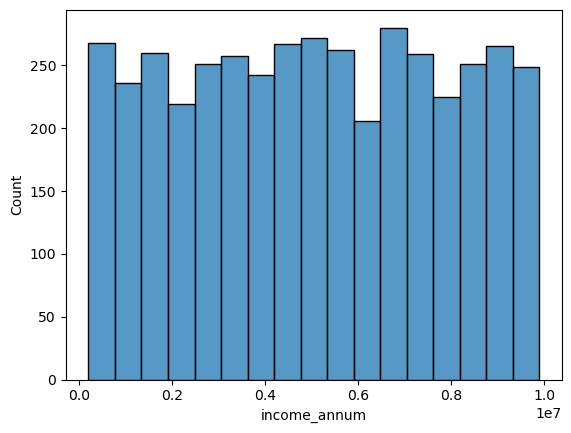

In [50]:
# Histogram
sns.histplot(x='income_annum', data=df)
plt.show

In [ ]:
sns.scatterplot()

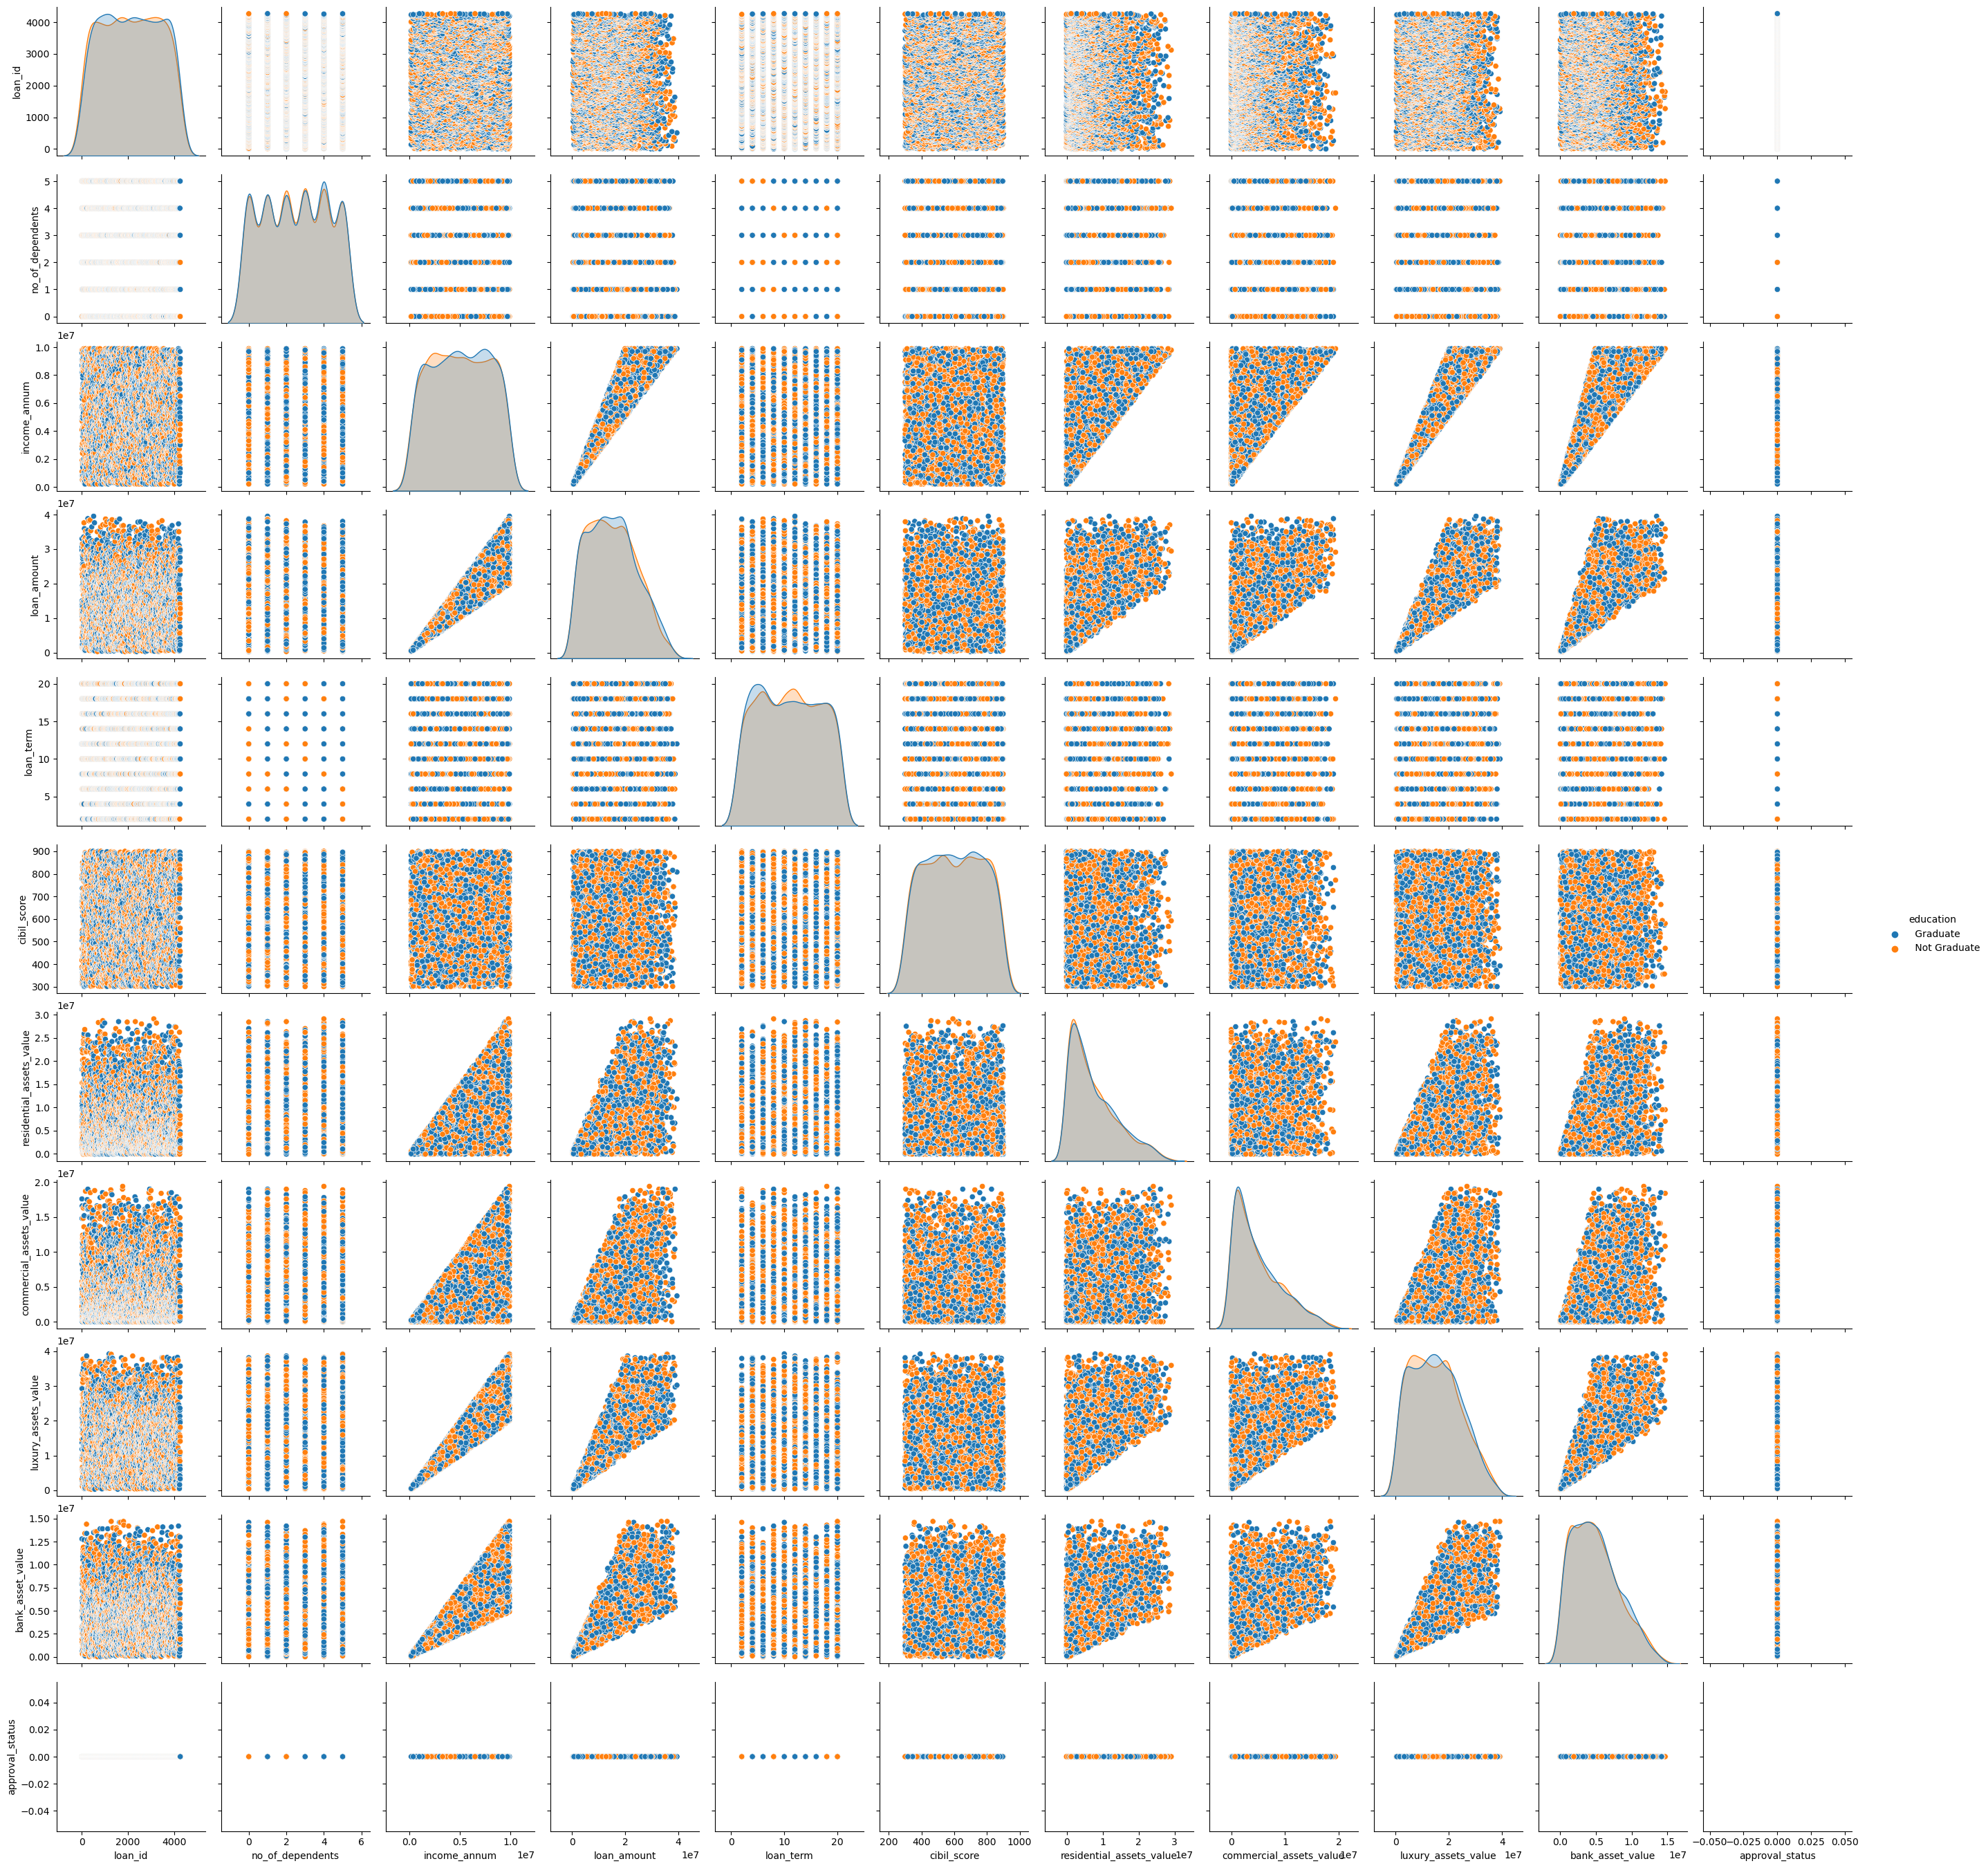

In [51]:
sns.pairplot(data=df, hue='education')

<Axes: >

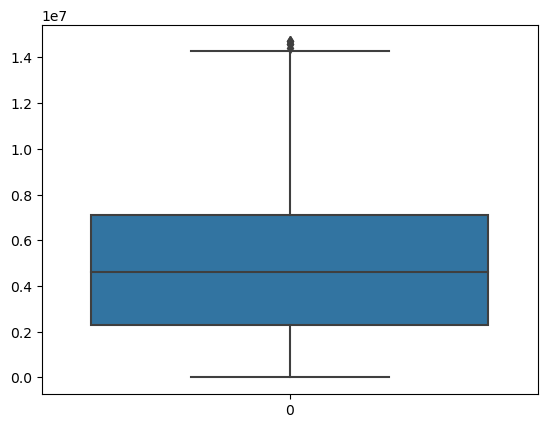

In [17]:
# Outliers
sns.boxplot(df['bank_asset_value'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   string
 3   self_employed             4269 non-null   string
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   string
 13  approval_status           4269 non-null   int32 
dtypes: int32(1), int64(10), 

In [75]:
# remove the space at the beginning of the loan_status value
df['loan_status'] = df['loan_status'].str.replace(" ","")

In [72]:
# add new column named approval_status based on the loan_status
# the idea is to find the relationship between loan_status and other features
df['approval_status'] = np.where(df['loan_status'] == 'Approved', 1, 0)

In [73]:
# checking value of approval_status
df['approval_status']

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: approval_status, Length: 4269, dtype: int32

<Axes: >

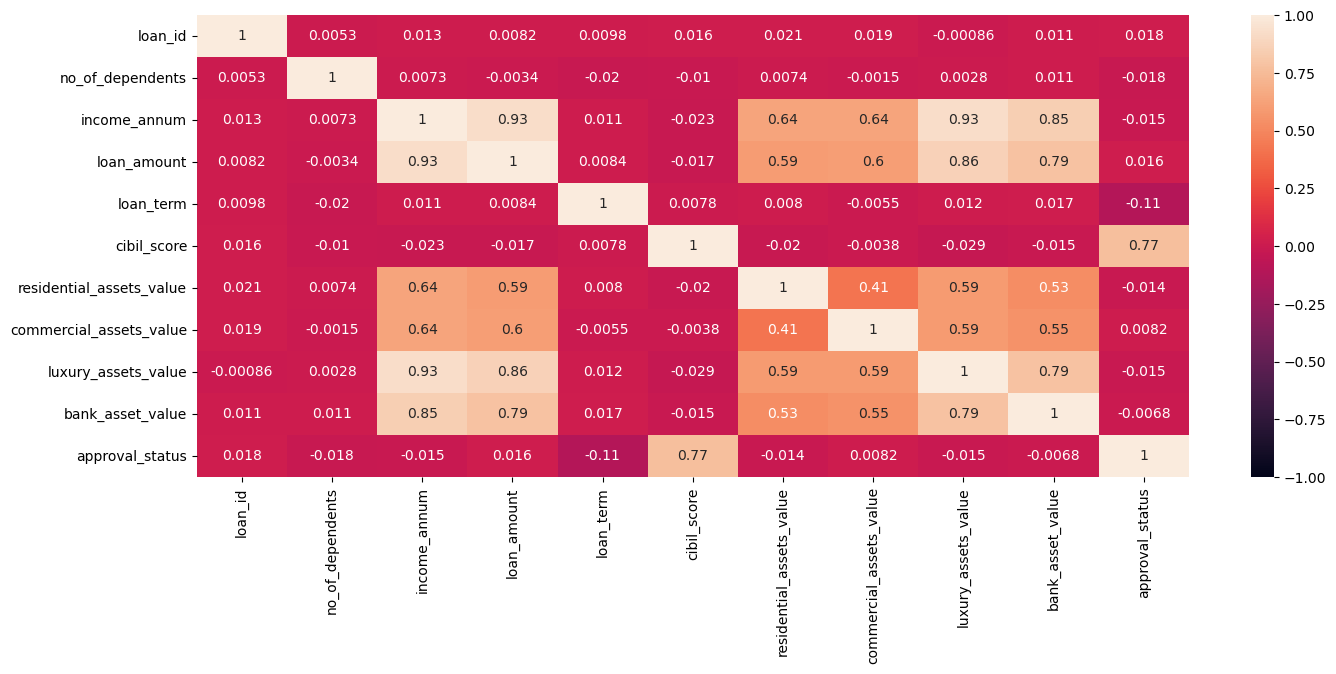

In [74]:
# using heat map to check the correlation between features
orr = df.loc[:, ~df.columns.isin(['education','self_employed', 'loan_status'])].corr()

plt.figure(figsize=(16,6))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)